### Setup notebook paramaters

In [1]:
import numpy as np
import pandas as pd
import os
import sys

from kde.location_project.kde_2d import (
    kdnearest, 
    learn_nearest_neighbors_bandwidth, 
    plot_kde,
    sample_from_kde
)
from kde.location_project.cmp import (
    calc_cmp,
    plot_scatter
)
from emd import emd

import matplotlib.pyplot as plt
import plotly
from plotly.offline import (
    download_plotlyjs, init_notebook_mode, plot, iplot
)
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline
init_notebook_mode(connected=True)

sys.setrecursionlimit(10000)
# # turn off SettingWithCopyWarning
# pd.options.mode.chained_assignment = None 

%load_ext autoreload
%autoreload 2

np.random.seed(1234)
directory = os.path.join("..", "data") 

# Earth Mover's Distance

## Explore on simulated data

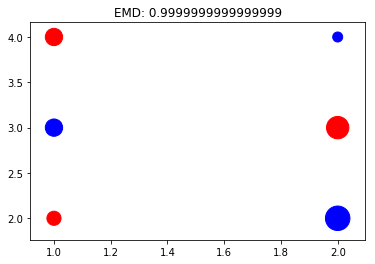

In [2]:
from emd import emd

X = np.array([[1,2], [1,4], [2,3]])
X_wts = np.atleast_2d(np.array([0.2, 0.3, 0.5])).T
Y = np.array([[1,3], [2,2], [2,4]])
Y_wts = np.atleast_2d(np.array([0.3, 0.6, 0.1])).T

# EMD is symmetric
assert(emd(X, Y, X_weights=X_wts, Y_weights=Y_wts) \
    == emd(Y, X, X_weights=Y_wts, Y_weights=X_wts))

# plot it
plt.scatter(X[:,0], X[:,1], s=X_wts*1000, c='red')
plt.scatter(Y[:,0], Y[:,1], s=Y_wts*1000, c='blue')
plt.title("EMD: {}".format(emd(X, Y, X_weights=X_wts, Y_weights=Y_wts)))
plt.show()

### Simulate from a 2d normal & add noise for second point pattern

EMD scales linearly as the distance between points increases.

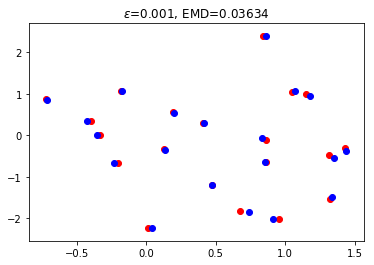

In [3]:
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[1, 0], [0, 1]],
    size=20
)
eps = 0.001
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(eps, round(emd(X, Y),5)))
plt.show()

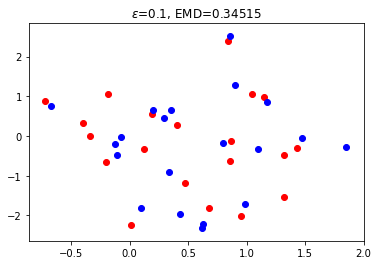

In [4]:
eps = 0.1
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(
    eps, 
    round(emd(X, Y),5))
)
plt.show()

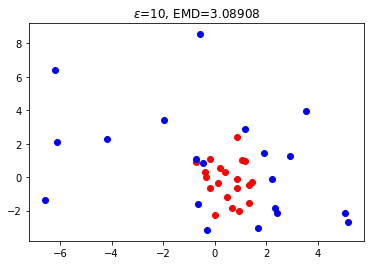

In [5]:
eps = 10
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(
    eps, 
    round(emd(X, Y),5))
)
plt.show()

### Unequal number of points

Appears to only have an impact when $\epsilon$ is small, which could result in larger distances for same-source pairs.

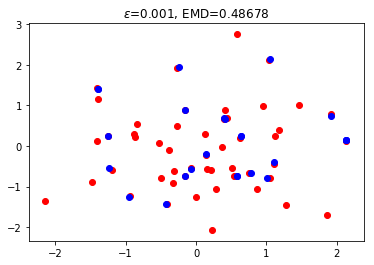

In [6]:
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[1, 0], [0, 1]],
    size=50
)
eps = 0.001
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=50
)
Y = Y[np.random.randint(0,len(X),25), :]
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(eps, round(emd(X, Y),5)))
plt.show()

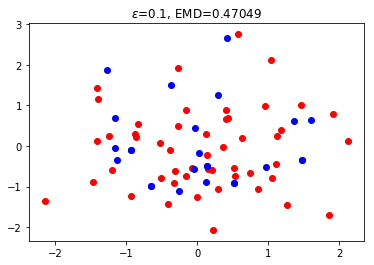

In [7]:
eps = 0.1
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=50
)
Y = Y[np.random.randint(0,len(X),25), :]
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(eps, round(emd(X, Y),5)))
plt.show()

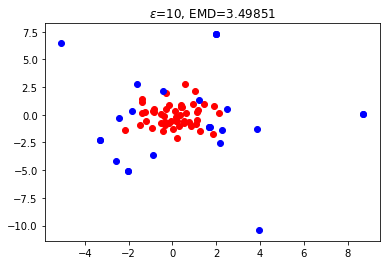

In [8]:
eps = 10
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=50
)
Y = Y[np.random.randint(0,len(X),25), :]
plt.scatter(X[:,0], X[:,1], c='red')
plt.scatter(Y[:,0], Y[:,1], c='blue')
plt.title("$\epsilon$={}, EMD={}".format(eps, round(emd(X, Y),5)))
plt.show()

### Incorporating weights

Similar effect as unequal numbers of points, but higher variability across simulated point sets when $\epsilon$ is low (not shown in this notebook).

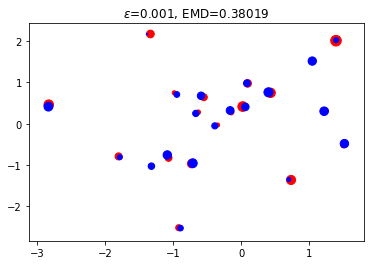

In [9]:
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[1, 0], [0, 1]],
    size=20
)
X_wts = np.random.uniform(0,1,20)
X_wts /= sum(X_wts)
eps = 0.001
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
Y_wts = np.random.uniform(0,1,20)
Y_wts /= sum(Y_wts)
plt.scatter(X[:,0], X[:,1], s=X_wts*1000, c='red')
plt.scatter(Y[:,0], Y[:,1], s=Y_wts*1000, c='blue')
plt.title("$\epsilon$={}, EMD={}".format(
    eps, 
    round(emd(X, Y, X_weights=X_wts, Y_weights=Y_wts),5))
)
plt.show()

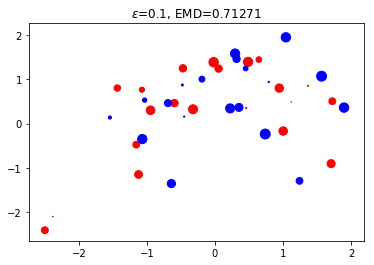

In [10]:
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[1, 0], [0, 1]],
    size=20
)
X_wts = np.random.uniform(0,1,20)
X_wts /= sum(X_wts)
eps = 0.1
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
Y_wts = np.random.uniform(0,1,20)
Y_wts /= sum(Y_wts)
plt.scatter(X[:,0], X[:,1], s=X_wts*1000, c='red')
plt.scatter(Y[:,0], Y[:,1], s=Y_wts*1000, c='blue')
plt.title("$\epsilon$={}, EMD={}".format(
    eps, 
    round(emd(X, Y, X_weights=X_wts, Y_weights=Y_wts),5))
)
plt.show()

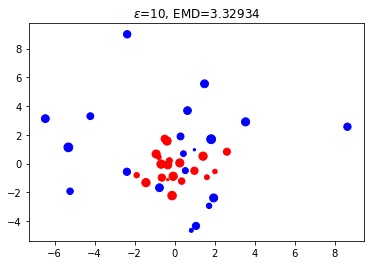

In [11]:
X = np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[1, 0], [0, 1]],
    size=20
)
X_wts = np.random.uniform(0,1,20)
X_wts /= sum(X_wts)
eps = 10
Y = X + np.random.multivariate_normal(
    mean=[0, 0],
    cov=[[eps, 0], [0, eps]],
    size=20
)
Y_wts = np.random.uniform(0,1,20)
Y_wts /= sum(Y_wts)
plt.scatter(X[:,0], X[:,1], s=X_wts*1000, c='red')
plt.scatter(Y[:,0], Y[:,1], s=Y_wts*1000, c='blue')
plt.title("$\epsilon$={}, EMD={}".format(
    eps, 
    round(emd(X, Y, X_weights=X_wts, Y_weights=Y_wts),5))
)
plt.show()

# CMP with EMD

### Load the visits data & test integrity

In [12]:
mpp = pd.read_csv(os.path.join(directory, "mpp_visits_month0a_month1b_n20.csv"))
mpp = mpp.loc[mpp.uid != 55]

pop_deduped = pd.read_csv(os.path.join(directory, "parcel_ass-oc-visits-ass_events_deduped_bw.csv"))
pop_kde_data = np.array(pop_deduped[['uid', 'lon', 'lat', 'bw']])


In [13]:
# plot_scatter(mpp=mpp, df=pop_deduped, uid=1)

In [14]:
import time
from pprint import pprint

start = time.clock()
pprint(calc_cmp(mpp, pop_kde_data, userA=1, n_sim=10, k=1, prnt=True))
end = time.clock()
print("\nTime:", round(end - start, 2), "s")

USERS {1}
Number of unique locations (across A & B): 31
Number of locations in common (in both A & B): 5
Number of matched users: 11
Number of sample points: 1253
Sum of weights: 1.0

{'cmp_emd': 0.0,
 'cmp_mean': 0.0,
 'cmp_median': 0.4,
 'obs_emd': 2.850063343599591,
 'obs_mean': 1.418316904988363,
 'obs_med': 0.21305388248339802}

Time: 1.85 s


In [15]:
start = time.clock()
pprint(calc_cmp(mpp, pop_kde_data, userA=1, userB=4, n_sim=100, k=1, prnt=True))
end = time.clock()
print("\nTime:", round(end - start, 2), "s")

USERS {1, 4}
Number of unique locations (across A & B): 27
Number of locations in common (in both A & B): 0
Number of matched users: 21
Number of sample points: 2463
Sum of weights: 1.0

{'cmp_emd': 1.0,
 'cmp_mean': 1.0,
 'cmp_median': 1.0,
 'obs_emd': 21.760652812939888,
 'obs_mean': 17.873691478407267,
 'obs_med': 13.960645286040574}

Time: 7.1 s


### Same-source pairs

In [16]:
np.random.seed(1234)

# PARAMETERS
n_sim = 1000
k = 1  # which nearest neighbor to use in distance computation
users = mpp['uid'].unique()
same_src = []

for u in users:
    print("User", u)
    tmp = calc_cmp(
        mpp, pop_kde_data, userA=u, n_sim=n_sim, k=k
    )
    tmp['a'] = u
    tmp['b'] = u
    same_src.append(tmp)
        
same = pd.DataFrame.from_dict(same_src)
same.to_csv(os.path.join(directory, "cmp_visits_emd_month0a_month1b_n20_same-src.csv"), index=False)

User 1
User 2
User 3
User 4
User 5
User 6
User 7
User 8
User 9
User 10
User 11
User 12
User 13
User 14
User 15
No other visits overlap with this pattern, using population only.
User 16
User 17
User 18
User 19
User 20
User 21
User 22
User 23
User 24
User 25
User 26
User 27
User 28
User 29
User 30
User 31
User 32
User 33
User 34
User 35
User 36
User 37
User 38
User 39
User 40
User 41
User 42
User 43
User 44
User 45
User 46
User 47
User 48
User 49
User 50
User 51
User 52
User 53
User 54
User 56
User 57
User 58
User 59
User 60
User 61
User 62
User 63
No other visits overlap with this pattern, using population only.
User 64
User 65
User 66
User 67
User 68
User 69
User 70
User 71
User 72
User 73
User 74
User 75
User 76
User 77
User 78
User 79
User 80
User 81
User 82
User 83
User 84
User 85
User 86
User 87
No other visits overlap with this pattern, using population only.
User 88
User 89
User 90
User 91
User 92
User 93
User 94
User 95
User 96
User 97
User 98
No other visits overlap with this p

### Different-source pairs (random sample)

In [17]:
usr_sample1 = np.random.choice(users, 300, replace=True)  
usr_sample2 = np.random.choice(users, 300, replace=True) 
samp = np.hstack([np.atleast_2d(usr_sample1).T, np.atleast_2d(usr_sample2).T])
samp[~(samp[:,0] == samp[:,1]), :][:250,:]

diff_src = []
for i in range(250):
    print(i)
    tmp = calc_cmp(
        mpp, pop_kde_data, userA=samp[i,0], userB=samp[i,1], n_sim=n_sim, k=k
    )
    tmp['a'] = samp[i,0]
    tmp['b'] = samp[i,1]
    diff_src.append(tmp)

diff = pd.DataFrame.from_dict(diff_src)
diff.to_csv(os.path.join(directory, "cmp_visits_emd_month0a_month1b_n20_diff-src.csv"), index=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
No other visits overlap with this pattern, using population only.
49
50
51
52
53
54
55
56
57
58
59
60
61
62
No other visits overlap with this pattern, using population only.
63
64
65
66
67
68
69
70
71
72
73
74
75
No other visits overlap with this pattern, using population only.
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
No other visits overlap with this pattern, using population only.
91
92
93
94
95
96
97
98
99
100
101
102
103
104
No other visits overlap with this pattern, using population only.
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
No other visits overlap with this pattern, using population only.
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
17

### Visualize Results

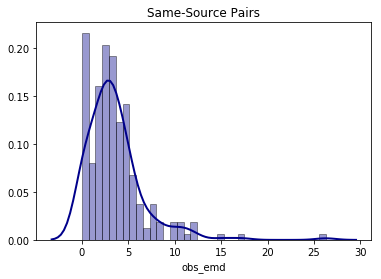

In [27]:
sns.distplot(
    same['obs_emd'], 
    hist=True, 
    kde=True, 
    bins=int(180/5), 
    color = 'darkblue', 
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 2}
).set_title('Same-Source Pairs')
plt.show()

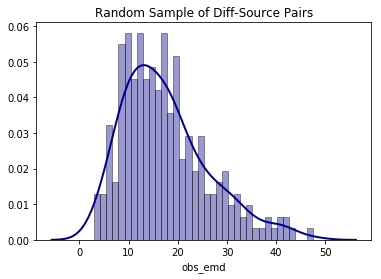

In [28]:
sns.distplot(
    diff['obs_emd'], 
    hist=True, 
    kde=True, 
    bins=int(180/5), 
    color = 'darkblue', 
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 2}
).set_title('Random Sample of Diff-Source Pairs')
plt.show()

In [23]:
same.describe()

,a,b,cmp_emd,cmp_mean,cmp_median,obs_emd,obs_mean,obs_med
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,112.256757,112.256757,0.092045,0.235986,0.478032,3.545435,1.652923,0.739222
std,64.550249,64.550249,0.208077,0.303858,0.363569,3.209412,1.974184,1.819549
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.250000,57.250000,0.000000,0.001000,0.071250,1.736532,0.366168,0.018107
50%,112.500000,112.500000,0.005000,0.083500,0.503000,3.031516,1.222961,0.156372
75%,167.750000,167.750000,0.057500,0.375000,0.817500,4.491452,2.259666,0.585886
max,223.000000,223.000000,0.999000,1.000000,1.000000,26.269803,14.829311,14.829311


In [24]:
diff.describe()

,a,b,cmp_emd,cmp_mean,cmp_median,obs_emd,obs_mean,obs_med
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,110.912000,111.78400,0.747576,0.856004,0.862076,17.423419,11.783057,11.600763
std,63.822988,65.90916,0.303603,0.225908,0.213023,8.720940,8.042528,8.440361
min,1.000000,1.00000,0.000000,0.000000,0.000000,2.984629,0.000000,0.000000
25%,57.500000,56.00000,0.606250,0.819250,0.809000,11.032312,5.529258,5.224457
50%,108.000000,110.00000,0.890000,0.968000,0.965000,15.855059,10.438992,10.069126
75%,163.000000,169.75000,0.997000,1.000000,1.000000,22.250375,15.339248,15.382731
max,223.000000,221.00000,1.000000,1.000000,1.000000,47.543492,42.916974,44.164748


In [80]:
from sklearn.metrics import roc_auc_score

# label the points to compute the AUC... same-src has smaller cmp
same['inv_label'] = False
diff['inv_label'] = True
rslt = pd.concat([same, diff])

# compute AUC
print("EMD:", round(roc_auc_score(rslt['inv_label'], rslt['cmp_emd']),4))
print("Mean IET:", round(roc_auc_score(rslt['inv_label'], rslt['cmp_mean']),4))
print("Median IET:", round(roc_auc_score(rslt['inv_label'], rslt['cmp_median']),4))

EMD: 0.9475
Mean IET: 0.9314
Median IET: 0.8217


In [86]:
def perf_measure(y_actual, y_hat):
    y_actual = list(y_actual)
    y_hat = list(y_hat)

    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)
    
    return (round(tpr, 3), round(fpr, 3))

In [87]:
print("EMD")
print("0.05:", perf_measure(rslt.match, rslt.cmp_emd <= 0.05))
print("0.001:", perf_measure(rslt.match, rslt.cmp_emd <= 0.001))

EMD
0.05: (0.734, 0.028)
0.001: (0.423, 0.004)


In [88]:
print("MEAN IED")
print("0.05:", perf_measure(rslt.match, rslt.cmp_mean <= 0.05))
print("0.001:", perf_measure(rslt.match, rslt.cmp_mean <= 0.001))

MEAN IED
0.05: (0.441, 0.008)
0.001: (0.257, 0.004)


In [89]:
print("MEDIAN IED")
print("0.05:", perf_measure(rslt.match, rslt.cmp_median <= 0.05))
print("0.001:", perf_measure(rslt.match, rslt.cmp_median <= 0.001))

MEDIAN IED
0.05: (0.23, 0.004)
0.001: (0.153, 0.004)
